# Дискретные случайные процессы и временные ряды, DS-поток
## Задание TS.1
### Временные ряды. Прогнозирование временного ряда с помощью сведения к задаче регрессии.

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 100 баллов
* Задача 2 &mdash; 120 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средняя:* задача 2.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso

from tqdm import tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

warnings.simplefilter("ignore", category=ConvergenceWarning)

___
### Задача 1
В данной задаче вы будете работать с данными о погоде. Архив с данными следует скачать по [ссылке](https://disk.yandex.ru/d/Teb7CiyVa9EmEA). Датасет содержит данные погоды примерно за 5 лет для городов США, Канады и Израиля. Данные разбиты на несколько файлов:
* `city_attributes.csv` &mdash; для каждого города указана страна и его координаты;
* `humidity.csv` &mdash; относительная влажность;
* `preassure.csv` &mdash; давление;
* `temperature.csv` &mdash; температура в градусах Кельвина;
* `weather_description.csv` &mdash; текстовое описание погоды;
* `wind_direction.csv` &mdash; направление ветра в градусах;
* `wind_speed.csv` &mdash; скорость ветра м/с.

В этой задаче вы проведете первичный анализ данных и сделаете несколько визуализаций.

__1.__ Средние температура и влажность.\
Посмотрим на данные в целом. Рассмотрим такие показатели как температура и влажность.

* Посчитайте среднюю температуру и влажность для каждого города за каждый месяц. Всего должно получиться 12 месяцев. 
* Полученные данные объедините с данными о городах (например, с помощью функции `pandas.DataFrame.merge`) в новую таблицу. 
* Новую таблицу используйте для отображения графика. Для визуализации используйте `plotly.express.scatter_mapbox`, про функцию можно посмотреть в [документации](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) или в [примерах](https://plotly.com/python/scattermapbox/).  Итоговый график должен представлять из себя карту, где в каждая точка соответствует городу. Цвет точки соответствует средней температуре, размер точки &mdash; влажности. Кроме того установите параметр `animation_frame` равным месяцу в году. В итоге график должен отображать среднюю температуру и влажность за каждый месяц, а скроллинг должен отображать картинку для каждого месяца в году.
* Сделайте выводы о погоде на основе полученного графика. Чем больше ключевых моментов в выводе, тем лучше.

Посчитаме среднюю температуру и влажность для каждого города

In [37]:
temprature_df = pd.read_csv("weather_ts/temperature.csv")

In [38]:
temprature_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


Для начала переведем Кельвины в Цельсии

In [39]:
temprature_df.loc[:, temprature_df.columns != "datetime"] = temprature_df.drop("datetime", axis = 1).apply(lambda x: x - 273.15)

In [40]:
temprature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

Как видим, datetime не определилось корректно. Преобразуем его к типу datetime.

In [41]:
temprature_df["datetime"] = pd.to_datetime(temprature_df["datetime"], format = "%Y-%m-%d %H:%M:%S")

Всего строк в датасете

In [42]:
len(temprature_df)

45253

Посмотрим на основные характеристики.

In [43]:
temprature_df.describe()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,45253,44458.000000,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,...,45250.000000,44460.000000,45250.000000,45250.000000,44455.000000,44460.000000,44461.000000,44455.000000,44456.000000,44460.000000
mean,2015-05-02 06:00:00,10.712654,11.842929,15.005821,11.259626,17.696116,17.065044,19.274887,22.343358,12.467856,...,12.224168,12.250406,7.193010,10.629823,18.371986,21.362307,23.347276,22.116398,20.944803,20.034253
min,2012-10-01 12:00:00,-28.000000,-10.780000,-0.850000,-9.370000,-6.646333,-7.366667,-12.588667,-7.091000,-18.107667,...,-22.760000,-22.376000,-29.850000,-23.610000,-0.971000,-2.101000,-2.000000,-2.000000,-4.468000,-0.176000
25%,2014-01-15 21:00:00,6.010000,6.700000,11.520000,6.680000,13.230000,13.104750,10.770000,14.530000,4.820000,...,4.200636,4.220000,-1.178250,2.940000,12.216623,16.300000,16.584000,17.317333,16.731833,14.374279
50%,2015-05-02 06:00:00,10.300000,11.170000,14.460000,10.790000,17.380000,16.968750,18.877486,22.436667,12.970000,...,12.777583,12.720000,7.959000,10.983250,17.782667,21.750000,23.000000,21.670000,21.000000,19.846000
75%,2016-08-15 15:00:00,15.450785,16.301750,17.865167,15.380000,21.930000,20.957542,27.685000,29.900000,19.685643,...,20.646000,20.610000,17.219583,18.470000,24.120000,26.650000,30.000000,26.510000,25.780000,26.000000
max,2017-11-30 00:00:00,33.850000,39.370000,40.470000,34.150000,42.320000,40.210000,45.490000,48.070000,39.560000,...,34.850000,37.090000,34.730000,34.850000,41.670000,47.780000,47.000000,47.780000,40.000000,43.890000
std,NaN,6.640131,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,...,10.242377,10.220932,11.953626,9.802499,7.821815,6.676412,8.852984,6.324566,6.304118,7.093583


Отсюда видно, что почти все города имеют пропуски в данных, и не имеют выбросов.

Учитывая это, можно посчитаем среднюю температуру по месяцам.

In [44]:
type(temprature_df["datetime"].iloc[5])

pandas._libs.tslibs.timestamps.Timestamp

In [45]:
mean_temperature_per_month = temprature_df.groupby(temprature_df["datetime"].dt.month).mean().drop("datetime", axis = 1).T.round(2)
mean_temperature_per_month.columns.name = "City"

In [46]:
mean_temperature_per_month.head()

City,1,2,3,4,5,6,7,8,9,10,11,12
Vancouver,3.44,4.79,7.01,9.66,13.72,16.23,18.98,19.11,15.28,10.63,6.23,3.12
Portland,3.58,6.01,8.55,10.67,14.57,17.35,20.32,20.78,16.84,11.68,8.08,4.07
San Francisco,10.31,11.84,13.28,14.31,15.84,17.86,19.47,18.86,18.97,16.17,12.78,10.02
Seattle,4.44,5.97,7.92,10.18,13.94,16.44,18.90,19.19,15.69,11.24,7.37,4.26
Los Angeles,12.41,13.58,15.49,16.48,17.84,20.87,23.28,23.22,22.74,18.88,15.46,12.07


Теперь то же самое проделаем с влажностью

In [47]:
humidity_df = pd.read_csv("weather_ts/humidity.csv")

In [48]:
humidity_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [49]:
humidity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          43427 non-null  float64
 2   Portland           44804 non-null  float64
 3   San Francisco      44311 non-null  float64
 4   Seattle            44964 non-null  float64
 5   Los Angeles        45101 non-null  float64
 6   San Diego          44909 non-null  float64
 7   Las Vegas          44411 non-null  float64
 8   Phoenix            43945 non-null  float64
 9   Albuquerque        44543 non-null  float64
 10  Denver             43445 non-null  float64
 11  San Antonio        44689 non-null  float64
 12  Dallas             44934 non-null  float64
 13  Houston            45132 non-null  float64
 14  Kansas City        44741 non-null  float64
 15  Minneapolis        44743 non-null  float64
 16  Saint Louis        439

In [50]:
humidity_df["datetime"] = pd.to_datetime(humidity_df["datetime"], format = "%Y-%m-%d %H:%M:%S")

In [51]:
mean_humidity_per_month = humidity_df.groupby(humidity_df["datetime"].dt.month).mean().drop("datetime", axis = 1).T.round(2)
mean_humidity_per_month.columns.name = "City"

In [52]:
mean_humidity_per_month.head()

City,1,2,3,4,5,6,7,8,9,10,11,12
Vancouver,89.14,86.33,83.56,79.29,78.71,75.17,72.52,75.66,82.24,87.30,85.71,87.24
Portland,82.57,82.16,77.79,72.23,67.68,66.41,61.63,62.61,70.09,82.42,82.91,85.77
San Francisco,76.36,78.49,76.37,71.48,77.29,79.95,77.87,80.56,75.42,75.61,76.67,76.63
Seattle,85.57,82.95,80.13,73.09,70.42,67.29,65.26,66.23,75.68,85.41,86.06,85.28
Los Angeles,58.26,62.03,62.33,59.96,66.55,69.96,67.87,67.14,62.79,59.71,57.51,60.62


In [53]:
city_attributes = pd.read_csv("weather_ts/city_attributes.csv")
city_attributes.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [54]:
full_info_df = pd.merge(
    city_attributes,
    mean_temperature_per_month,
    left_on="City",
    right_index=True,
    how = "left"
)

full_info_df = pd.merge(
    full_info_df,
    mean_humidity_per_month,
    left_on="City",
    right_index=True,
    how = "left",
    suffixes=('_df1', '_df2')
)

In [55]:
months = [str(i) for i in range(1, 13)]

for month in months:
    full_info_df[month] = full_info_df[[f"{month}_df1", f"{month}_df2"]].apply(
        lambda row: {"Temperature": row.iloc[0], "Humidity": row.iloc[1]}, axis=1
    )
    full_info_df = full_info_df.drop(columns=[f"{month}_df1", f"{month}_df2"])

In [56]:
full_info_df.head()

,City,Country,Latitude,Longitude,1,2,3,4,5,6,7,8,9,10,11,12
0,Vancouver,Canada,49.249660,-123.119339,"{'Temperature': 3.44, 'Humidity': 89.14}","{'Temperature': 4.79, 'Humidity': 86.33}","{'Temperature': 7.01, 'Humidity': 83.56}","{'Temperature': 9.66, 'Humidity': 79.29}","{'Temperature': 13.72, 'Humidity': 78.71}","{'Temperature': 16.23, 'Humidity': 75.17}","{'Temperature': 18.98, 'Humidity': 72.52}","{'Temperature': 19.11, 'Humidity': 75.66}","{'Temperature': 15.28, 'Humidity': 82.24}","{'Temperature': 10.63, 'Humidity': 87.3}","{'Temperature': 6.23, 'Humidity': 85.71}","{'Temperature': 3.12, 'Humidity': 87.24}"
1,Portland,United States,45.523449,-122.676208,"{'Temperature': 3.58, 'Humidity': 82.57}","{'Temperature': 6.01, 'Humidity': 82.16}","{'Temperature': 8.55, 'Humidity': 77.79}","{'Temperature': 10.67, 'Humidity': 72.23}","{'Temperature': 14.57, 'Humidity': 67.68}","{'Temperature': 17.35, 'Humidity': 66.41}","{'Temperature': 20.32, 'Humidity': 61.63}","{'Temperature': 20.78, 'Humidity': 62.61}","{'Temperature': 16.84, 'Humidity': 70.09}","{'Temperature': 11.68, 'Humidity': 82.42}","{'Temperature': 8.08, 'Humidity': 82.91}","{'Temperature': 4.07, 'Humidity': 85.77}"
2,San Francisco,United States,37.774929,-122.419418,"{'Temperature': 10.31, 'Humidity': 76.36}","{'Temperature': 11.84, 'Humidity': 78.49}","{'Temperature': 13.28, 'Humidity': 76.37}","{'Temperature': 14.31, 'Humidity': 71.48}","{'Temperature': 15.84, 'Humidity': 77.29}","{'Temperature': 17.86, 'Humidity': 79.95}","{'Temperature': 19.47, 'Humidity': 77.87}","{'Temperature': 18.86, 'Humidity': 80.56}","{'Temperature': 18.97, 'Humidity': 75.42}","{'Temperature': 16.17, 'Humidity': 75.61}","{'Temperature': 12.78, 'Humidity': 76.67}","{'Temperature': 10.02, 'Humidity': 76.63}"
3,Seattle,United States,47.606209,-122.332069,"{'Temperature': 4.44, 'Humidity': 85.57}","{'Temperature': 5.97, 'Humidity': 82.95}","{'Temperature': 7.92, 'Humidity': 80.13}","{'Temperature': 10.18, 'Humidity': 73.09}","{'Temperature': 13.94, 'Humidity': 70.42}","{'Temperature': 16.44, 'Humidity': 67.29}","{'Temperature': 18.9, 'Humidity': 65.26}","{'Temperature': 19.19, 'Humidity': 66.23}","{'Temperature': 15.69, 'Humidity': 75.68}","{'Temperature': 11.24, 'Humidity': 85.41}","{'Temperature': 7.37, 'Humidity': 86.06}","{'Temperature': 4.26, 'Humidity': 85.28}"
4,Los Angeles,United States,34.052231,-118.243683,"{'Temperature': 12.41, 'Humidity': 58.26}","{'Temperature': 13.58, 'Humidity': 62.03}","{'Temperature': 15.49, 'Humidity': 62.33}","{'Temperature': 16.48, 'Humidity': 59.96}","{'Temperature': 17.84, 'Humidity': 66.55}","{'Temperature': 20.87, 'Humidity': 69.96}","{'Temperature': 23.28, 'Humidity': 67.87}","{'Temperature': 23.22, 'Humidity': 67.14}","{'Temperature': 22.74, 'Humidity': 62.79}","{'Temperature': 18.88, 'Humidity': 59.71}","{'Temperature': 15.46, 'Humidity': 57.51}","{'Temperature': 12.07, 'Humidity': 60.62}"


Перейдем к отображению на карте

In [57]:
for month in months:
    full_info_df[f'{month}_Temperature'] = full_info_df[month].apply(lambda x: x['Temperature'])
    full_info_df[f'{month}_Humidity'] = full_info_df[month].apply(lambda x: x['Humidity'])

df_long = full_info_df.melt(
    id_vars=['City', 'Country', 'Latitude', 'Longitude'],
    value_vars=[f'{month}_Temperature' for month in months] + [f'{month}_Humidity' for month in months],
    var_name='Month_Temperature_Humidity',
    value_name='Value'
)

df_long[['Month', 'Type']] = df_long['Month_Temperature_Humidity'].str.split('_', expand=True)
df_long.drop(columns=['Month_Temperature_Humidity'], inplace=True)

temperature_df = df_long[df_long['Type'] == 'Temperature']
humidity_df = df_long[df_long['Type'] == 'Humidity']

final_df = pd.merge(temperature_df, humidity_df, on=['City', 'Country', 'Latitude', 'Longitude', 'Month'])

final_df.rename(columns={
    'Value_x': 'Temperature',
    'Value_y': 'Humidity'
}, inplace=True)

final_df["Month"] = final_df["Month"].apply(lambda x: pd.to_datetime(f'2024-{int(x):02d}-01').strftime('%B'))

final_df.head()


,City,Country,Latitude,Longitude,Temperature,Month,Type_x,Humidity,Type_y
0,Vancouver,Canada,49.249660,-123.119339,3.44,January,Temperature,89.14,Humidity
1,Portland,United States,45.523449,-122.676208,3.58,January,Temperature,82.57,Humidity
2,San Francisco,United States,37.774929,-122.419418,10.31,January,Temperature,76.36,Humidity
3,Seattle,United States,47.606209,-122.332069,4.44,January,Temperature,85.57,Humidity
4,Los Angeles,United States,34.052231,-118.243683,12.41,January,Temperature,58.26,Humidity


In [58]:
import plotly.express as px

fig = px.scatter_mapbox(
    final_df,
    lat="Latitude",
    lon="Longitude",
    color="Temperature",  # Цвет будет зависеть от температуры
    size="Humidity",  # Размер точки будет зависеть от влажности
    hover_name="City",
    animation_frame="Month",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=1
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Temperature and Humidity by City (Monthly Animation)",
    hovermode='closest'
)

fig.show()


**Выводы**

Мы смогли корректно обрботать данные по влажности и температуре, в чем можно убедиться используя полученную карту.

Как и ожидалось чем южнее город, тем выше в нем температура.

Влажность почти везде одинакова, кроме городов находящихся в пустошах вроде Лас-Вегаса, здесь она меньше.

__2.__ Пропуски в данных.\
Хотя данные представлены довольно регулярно, они содержат немало пропусков. 
* Посчитайте пропуски для каждого из городов и для каждого из показателей погоды.

* Выберите город с наименьшим количеством пропусков. Назовем этот город X.

* Если данные имеют пропуски в начале или в конце, то лучше обрезать данные. Остальные пропуски стоит заполнить предыдущим значением по дате. Для этого вам может помочь функция `pandas.DataFrame.fillna`.

In [59]:
def get_city_names_with_min_missing_data(df, n=5):
    missing_data = df.isna().sum()
    return missing_data.nsmallest(n + 1).index[1:]

In [60]:
weather_df = pd.read_csv("weather_ts/weather_description.csv")
get_city_names_with_min_missing_data(weather_df)

Index(['Portland', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas'], dtype='object')

In [61]:
temperature_df = pd.read_csv("weather_ts/temperature.csv")
get_city_names_with_min_missing_data(temprature_df)

Index(['Portland', 'San Diego', 'Las Vegas', 'Albuquerque', 'Denver'], dtype='object')

In [62]:
humidity_df = pd.read_csv("weather_ts/humidity.csv")
get_city_names_with_min_missing_data(humidity_df)

Index(['Houston', 'Los Angeles', 'Jacksonville', 'Seattle', 'Dallas'], dtype='object')

In [63]:
wind_speed_df = pd.read_csv("weather_ts/wind_speed.csv")
get_city_names_with_min_missing_data(wind_speed_df)

Index(['Portland', 'Seattle', 'Los Angeles', 'San Diego', 'San Antonio'], dtype='object')

In [64]:
pressure_df = pd.read_csv("weather_ts/pressure.csv")
get_city_names_with_min_missing_data(pressure_df)

Index(['Charlotte', 'Portland', 'Philadelphia', 'Detroit', 'Boston'], dtype='object')

In [65]:
wind_direction_df = pd.read_csv("weather_ts/wind_direction.csv")
get_city_names_with_min_missing_data(wind_direction_df)

Index(['Portland', 'Seattle', 'Los Angeles', 'San Diego', 'Phoenix'], dtype='object')

In [66]:
def convert_to_datetime(df):
    df["datetime"] = pd.to_datetime(df["datetime"], format = "%Y-%m-%d %H:%M:%S")

convert_to_datetime(temperature_df)
convert_to_datetime(humidity_df)
convert_to_datetime(wind_speed_df)
convert_to_datetime(wind_direction_df)
convert_to_datetime(pressure_df)
convert_to_datetime(weather_df)

In [67]:
data = pd.concat([temperature_df, humidity_df, wind_speed_df, wind_direction_df, pressure_df, weather_df])

In [68]:
get_city_names_with_min_missing_data(data)

Index(['Houston', 'Jacksonville', 'Seattle', 'Dallas', 'Los Angeles'], dtype='object')

Как видим, меньше всего пропусков у города Хьюстон

In [69]:
houston_df = pd.DataFrame({
    "datetime":temperature_df["datetime"],
    "temprature": (temperature_df["Houston"] - 273.15).round(2),
    "humidity": humidity_df["Houston"],
    "wind_speed": wind_speed_df["Houston"],
    "wind_direction": wind_direction_df["Houston"],
    "pressure": pressure_df["Houston"],
    "weather_description": weather_df["Houston"]
})

In [70]:
numerical_types = ["temprature", "humidity", "wind_speed", "wind_direction", "pressure"]
categorical_types = ["weather_description"]

In [71]:
houston_df

,datetime,temprature,humidity,wind_speed,wind_direction,pressure,weather_description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,15.12,93.0,1.0,270.0,1009.0,sky is clear
2,2012-10-01 14:00:00,15.15,92.0,1.0,268.0,1008.0,sky is clear
3,2012-10-01 15:00:00,15.18,90.0,1.0,265.0,1008.0,sky is clear
4,2012-10-01 16:00:00,15.22,89.0,1.0,263.0,1008.0,sky is clear
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,22.00,68.0,2.0,344.0,1021.0,mist
45249,2017-11-29 21:00:00,22.67,73.0,2.0,20.0,1021.0,haze
45250,2017-11-29 22:00:00,23.22,50.0,3.0,300.0,1020.0,sky is clear
45251,2017-11-29 23:00:00,21.50,49.0,2.0,290.0,1020.0,haze


Как видим, пропуск есть в начале, и пропуска нет в конце.

In [72]:
houston_df = houston_df.drop(index=0)

In [73]:
houston_df = houston_df.ffill()

In [74]:
missing_data = houston_df.isna().sum()
missing_data

datetime               0
temprature             0
humidity               0
wind_speed             0
wind_direction         0
pressure               0
weather_description    0
dtype: int64

Как видим, пропусков больше нет.

__3.__ Визуализация данных для города X
* Отобразите значения всех числовых (температура, влажность, скорость ветра ...) для города X. Постройте **аккуратные** графики с помощью `plotly`. 

* Сделайте выводы о погоде для данного города.

In [75]:
day_houston_numerical_info = (
    houston_df[numerical_types]
    .groupby(houston_df["datetime"].dt.to_period("D"))  # Группировка по году, месяцу и дню
    .mean()
    .round(2)
).reset_index()

day_houston_numerical_info["datetime"] = day_houston_numerical_info["datetime"].dt.to_timestamp()
day_houston_numerical_info.head()

,datetime,temprature,humidity,wind_speed,wind_direction,pressure
0,2012-10-01,15.29,86.82,1.55,258.00,1008.09
1,2012-10-02,19.24,60.00,4.25,261.12,1008.29
2,2012-10-03,21.40,65.25,1.96,222.29,1012.29
3,2012-10-04,21.06,71.50,1.54,91.25,1015.54
4,2012-10-05,23.86,72.00,2.62,123.33,1018.67


Построим график зависимости от недели

In [76]:
def plot_line(data, y, title, y_label):
    fig = px.line(
        data,
        x="datetime",
        y=y,
        title=title,
        labels={"datetime": "Дата", y: y_label},
    )
    fig.show()

plot_line(day_houston_numerical_info, "temprature", "Температура по дням (Хьюстон)", "Температура (°C)")
plot_line(day_houston_numerical_info, "humidity", "Влажность по дням (Хьюстон)", "Влажность (%)")
plot_line(day_houston_numerical_info, "wind_speed", "Скорость ветра по дням (Хьюстон)", "Скорость ветра (м/с)")
plot_line(day_houston_numerical_info, "wind_direction", "Направление ветра (в градусах) по дням (Хьюстон)", "Направление ветра (в градусах)")
plot_line(day_houston_numerical_info, "pressure", "Атмосферное давление по дням (Хьюстон)", "Давление (гПа)")


**Выводы**

На графике можем наблюдать годичную сезонность в температуре и влажности. Также есть подозрение, что годичная сезонность есть в атмосферном давлении. Сезонность в скорости не замечена.

__4.__ Для города X будем предсказывать температуру с помощью моделей машинного обучения.
* Разбейте данные на обучение и тест. Для тестовой выборки используйте последнюю неделю из данных.

* Выберите одну из линейных моделей и какую-либо из моделей градиентного бустинга. Поясните свой выбор.

* Подготовьте данные для обучения и теста. Обратите внимание на то, что в зависимости от выбранной модели, вам может пригодиться разная обработка категориальных признаков.

* Выберите стратегию предсказания на несколько шагов вперед.

* Постройте и обучите выбранные модели. Попробуйте найти оптимальные значения гиперпараметров, используя процедуру кросс-валидации для временных рядов. Для этого вам могут быть полезны функции [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) и [`sklearn.model_selection.TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). В качестве метрики качества используйте MAPE.

* Выберите лучшую модель и посчитайте качество на тесте. Визуализируйте результат.

* Сделайте выводы.

Возьмем последнюю доступную неделю в качестве теста. Сразу закодируем информацию о погоди при помощи Label encoder

In [77]:
houston_df["datetime"].iloc[-1]

Timestamp('2017-11-30 00:00:00')

In [78]:
target = "temprature"

end_date = houston_df["datetime"].iloc[-1]
start_date = end_date - pd.Timedelta(days=7)

data_test = houston_df[(houston_df["datetime"] < end_date) & (houston_df["datetime"] >= start_date)]
data_train = houston_df[houston_df["datetime"] < start_date]


encoder = LabelEncoder()
data_train.loc[:, "weather_description"] = encoder.fit_transform(data_train["weather_description"])
data_test.loc[:, "weather_description"] = encoder.transform(data_test["weather_description"])

data_train["weather_description"] = data_train["weather_description"].astype(int)
data_test["weather_description"] = data_test["weather_description"].astype(int)

/tmp/ipykernel_21402/1319598109.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21402/1319598109.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Визуализируем полученные данные.

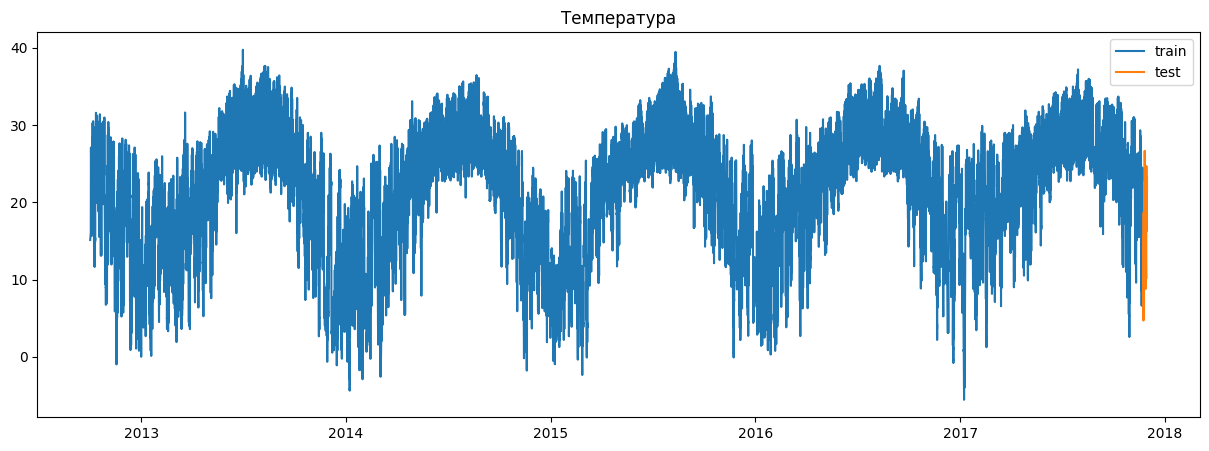

In [79]:
plt.figure(figsize=(15, 5))
plt.title("Температура")
plt.plot(data_train["datetime"], data_train[target], label="train")
plt.plot(data_test["datetime"], data_test[target], label="test")
plt.legend();


In [80]:
# Преобразование в секунды
data_train.loc[:, "seconds"] = data_train["datetime"].astype(np.int64) / 10**18
data_test.loc[:,"seconds"] = data_test["datetime"].astype(np.int64) / 10**18

/tmp/ipykernel_21402/288999713.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21402/288999713.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
data_train.head(-1)

,datetime,temprature,humidity,wind_speed,wind_direction,pressure,weather_description,seconds
1,2012-10-01 13:00:00,15.12,93.0,1.0,270.0,1009.0,22,1.349096
2,2012-10-01 14:00:00,15.15,92.0,1.0,268.0,1008.0,22,1.349100
3,2012-10-01 15:00:00,15.18,90.0,1.0,265.0,1008.0,22,1.349104
4,2012-10-01 16:00:00,15.22,89.0,1.0,263.0,1008.0,22,1.349107
5,2012-10-01 17:00:00,15.26,88.0,1.0,260.0,1008.0,3,1.349111
...,...,...,...,...,...,...,...,...
45078,2017-11-22 18:00:00,18.89,55.0,3.0,360.0,1023.0,3,1.511374
45079,2017-11-22 19:00:00,19.40,55.0,5.0,360.0,1022.0,3,1.511377
45080,2017-11-22 20:00:00,20.10,45.0,4.0,340.0,1021.0,3,1.511381
45081,2017-11-22 21:00:00,19.44,45.0,6.0,360.0,1021.0,22,1.511384


Выберем рекурсивную стратегию, так как она не требует большого количества моделей, и при этом не сильно ухудшает качество модели.
В качестве дополнительной информации будем хранить информацию за последние сутки

In [82]:
def add_additional_features(df):
    hours = [i for i in range(1, 24)]
    for hour in hours:
        df.loc[:, f"temprature_hour_{hour}"] = df["temprature"].shift(hour)

    return df.dropna(inplace=True)



add_additional_features(data_train)
add_additional_features(data_test)
X_train = data_train.drop([target, "datetime"], axis=1)
Y_train = data_train[target]

X_test = data_test.drop([target, "datetime"], axis=1)
Y_test = data_test[target]
data_train.head()

/tmp/ipykernel_21402/3915436670.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21402/3915436670.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21402/3915436670.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

/tmp/ipykernel_21402/3915436670.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21402/3915436670.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_21402/3915436670.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

,datetime,temprature,humidity,wind_speed,wind_direction,pressure,weather_description,seconds,temprature_hour_1,temprature_hour_2,...,temprature_hour_14,temprature_hour_15,temprature_hour_16,temprature_hour_17,temprature_hour_18,temprature_hour_19,temprature_hour_20,temprature_hour_21,temprature_hour_22,temprature_hour_23
24,2012-10-02 12:00:00,15.96,65.0,4.0,214.0,1008.0,0,1.349179,15.92,15.88,...,15.44,15.40,15.37,15.33,15.29,15.26,15.22,15.18,15.15,15.12
25,2012-10-02 13:00:00,15.99,64.0,4.0,212.0,1008.0,0,1.349183,15.96,15.92,...,15.48,15.44,15.40,15.37,15.33,15.29,15.26,15.22,15.18,15.15
26,2012-10-02 14:00:00,16.03,63.0,4.0,210.0,1008.0,0,1.349186,15.99,15.96,...,15.52,15.48,15.44,15.40,15.37,15.33,15.29,15.26,15.22,15.18
27,2012-10-02 15:00:00,20.79,52.0,5.0,310.0,1011.0,22,1.349190,16.03,15.99,...,15.55,15.52,15.48,15.44,15.40,15.37,15.33,15.29,15.26,15.22
28,2012-10-02 16:00:00,21.73,56.0,6.0,310.0,1011.0,22,1.349194,20.79,16.03,...,15.59,15.55,15.52,15.48,15.44,15.40,15.37,15.33,15.29,15.26


In [83]:
def create_new_info_function(row, previous_y_val):
    new_row = row.copy()
    # Делаем сдвиг на час назад, вместо информации за прошлый час вставляем информацию модели
    for hour in range(1, 23):
        new_row[f"temprature_hour_{hour + 1}"] = row[f"temprature_hour_{hour}"]

    new_row[f"temprature_hour_{1}"] = previous_y_val

    # display(new_row)

    return new_row


def recursive_prediction(model, X_train, Y_train, new_info_function = create_new_info_function, n=365):
    """
    Функция для рекурсивного предсказания временных рядов.

    Параметры:
    - model: обученная модель для предсказания.
    - n: Количество итераций.
    - X_train: обучающие данные, используемые моделью для предсказания.
    - Y_train: целевая переменная для обучения модели.

    Возвращает:
    - Массив предсказанных значений для тестовых данных.
    """
    predictions = []
    previous_y = list(Y_train)

    curr_test = X_train.iloc[-1]
    for i in range(1, n + 1):
        curr_prediction = model.predict(
            curr_test.to_numpy().reshape(1, -1)
        )  # Предсказание для текущей точки

        predictions.append(curr_prediction)
        previous_y.append(curr_prediction)
  
        if i == n:
            continue
        curr_test = new_info_function(curr_test, previous_y[-1])

    return np.array(predictions)

Возьмем обычную линейную модель в качестве основы для будущего сравнения.

In [84]:
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model.fit(X_train.to_numpy(), Y_train)


LinearRegression()

In [85]:
lin_reg_model_predictions = recursive_prediction(
    lin_reg_model,
    X_train,
    Y_train,
    n=len(X_test)
)


In [86]:
MAPE_LIN_REG = mean_absolute_percentage_error(Y_test, lin_reg_model_predictions)
MAPE_LIN_REG

np.float64(0.3352507615880697)

Отобразим полученные предсказания

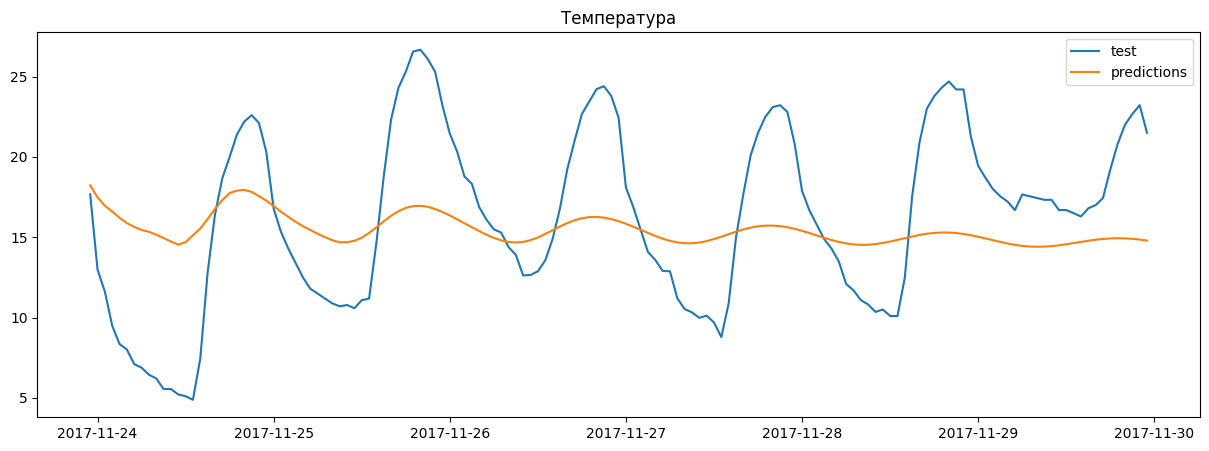

In [87]:
plt.figure(figsize=(15, 5))
plt.title("Температура")
plt.plot(data_test["datetime"], data_test[target], label="test")
plt.plot(data_test["datetime"], lin_reg_model_predictions, label="predictions")
plt.legend();

In [88]:
print(f"MAPE  полученное при помощи линейной регресии: {MAPE_LIN_REG:.3g}")

MAPE  полученное при помощи линейной регресии: 0.335


Как видим, линейная модель не может корректно отбработать зависимости в датасете.

Попробуем использовать бустинг на решающих деревьях. Будем использовать XGBoost

In [89]:
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train.to_numpy(), Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
xgboost_prediction = recursive_prediction(
    xgboost_model,
    X_train,
    Y_train,
    n=len(X_test)
)

MAPE_XGB_REG = mean_absolute_percentage_error(Y_test, xgboost_prediction)
MAPE_XGB_REG

np.float64(0.25172316780564225)

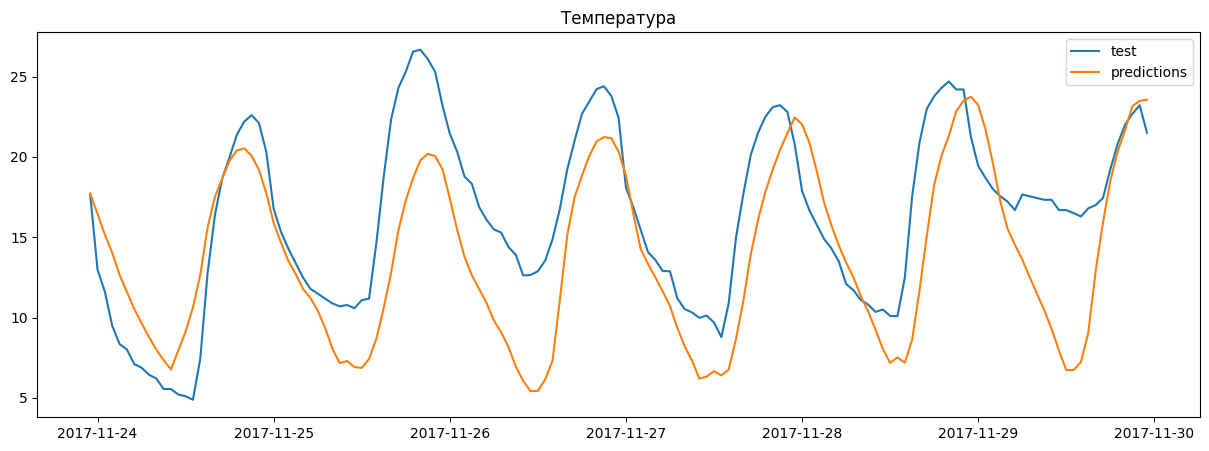

In [91]:
plt.figure(figsize=(15, 5))
plt.title("Температура")
plt.plot(data_test["datetime"], data_test[target], label="test")
plt.plot(data_test["datetime"], xgboost_prediction, label="predictions")
plt.legend();

In [92]:
print(f"MAPE полученное при помощи бустинга: {MAPE_XGB_REG:.3g}")

MAPE полученное при помощи бустинга: 0.252


Как видим, градиентный бустинг отработал лучше. Попытаемся подобрать оптимальные параметры для него

In [93]:
tscv = TimeSeriesSplit(n_splits=5)
param_dist = {
    "n_estimators": [1000],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5],
}
xgboost_model = XGBRegressor()
random_search = RandomizedSearchCV(
    xgboost_model,
    param_distributions=param_dist,
    n_iter=50,  # Количество случайных комбинаций
    cv=tscv,  # Кросс-валидация с использованием TimeSeriesSplit
    scoring="neg_mean_absolute_percentage_error",  # MAPE как метрика
    verbose=10,  # Печать прогресса
    random_state=42,
    n_jobs=-1,  # Используем все ядра процессора
)

random_search.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START learning_rate=0.05, max_depth=3, n_estimators=1000.........
[CV 2/5; 1/20] START learning_rate=0.05, max_depth=3, n_estimators=1000.........
[CV 3/5; 1/20] START learning_rate=0.05, max_depth=3, n_estimators=1000.........


/home/alexander/.local/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.



[CV 4/5; 1/20] START learning_rate=0.05, max_depth=3, n_estimators=1000.........
[CV 1/5; 1/20] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=-0.647 total time=   5.3s
[CV 5/5; 1/20] START learning_rate=0.05, max_depth=3, n_estimators=1000.........
[CV 3/5; 1/20] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=-0.040 total time=   6.1s
[CV 1/5; 2/20] START learning_rate=0.05, max_depth=4, n_estimators=1000.........
[CV 2/5; 1/20] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=-774810241524.273 total time=   7.1s
[CV 2/5; 2/20] START learning_rate=0.05, max_depth=4, n_estimators=1000.........
[CV 4/5; 1/20] END learning_rate=0.05, max_depth=3, n_estimators=1000;, score=-0.061 total time=  12.2s
[CV 3/5; 2/20] START learning_rate=0.05, max_depth=4, n_estimators=1000.........
[CV 1/5; 2/20] END learning_rate=0.05, max_depth=4, n_estimators=1000;, score=-0.589 total time=   6.3s
[CV 4/5; 2/20] START learning_rate=0.05, max_depth=4, n_estimato

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=No...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1,
                                                          0.25, 0.5],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [1000]},
                   random_state=42,
                   scoring='neg_mean_absolute_percentage_error', verbose=10)

In [94]:
best_params = random_search.best_params_
print("Лучшие гиперпараметры:", best_params)

Лучшие гиперпараметры: {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1}


In [95]:
xgboost_prediction = recursive_prediction(
    random_search.best_estimator_,
    X_train,
    Y_train,
    n=len(X_test)
)

MAPE_XGB_REG = mean_absolute_percentage_error(Y_test, xgboost_prediction)
MAPE_XGB_REG

np.float64(0.35836411264982293)

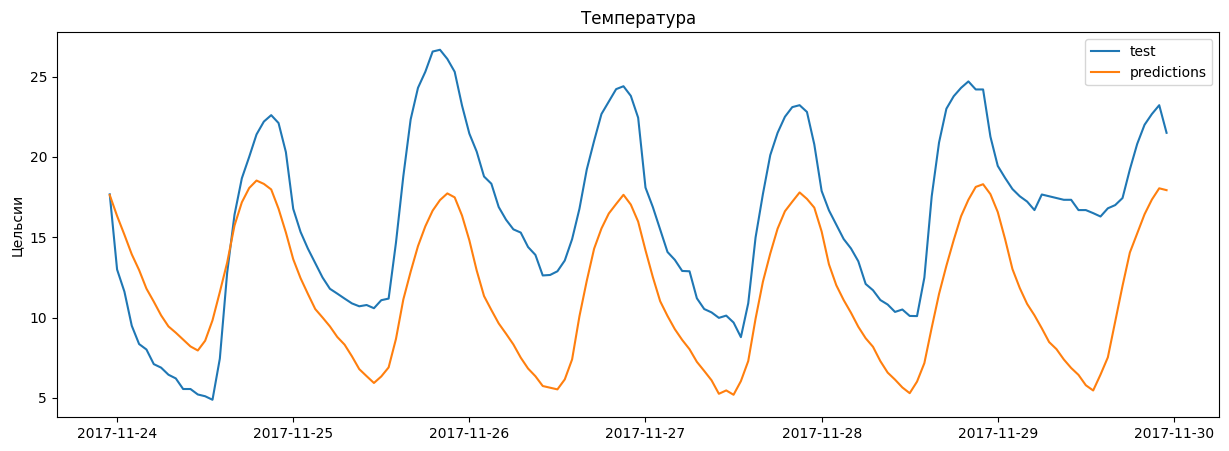

In [96]:
plt.figure(figsize=(15, 5))
plt.title("Температура")
plt.plot(data_test["datetime"], data_test[target], label="test")
plt.plot(data_test["datetime"], xgboost_prediction, label="predictions")
plt.ylabel("Цельсии")
plt.legend();

In [97]:
print(f"MAPE полученное при помощи лучшей модели бустинга: {MAPE_XGB_REG:.3g}")


MAPE полученное при помощи лучшей модели бустинга: 0.358


**Выводы**

В данной задаче мы исследовали работу с временными рядами. После обработки данных, мной была выбрана рекурсивная стратегия.

В качестве двух моделей я использовал линейную и градиентный бустинг на решающих деревьях.

По итогом эксперимента, можно сделать следующие выводы:

* Рекурсивная стратегия работает, и видно, что на обоих графиках происходит накопление ошибки, из-за чего наблюдается сдвиг.

* Из визуального анализа видно, что и линейная модель, и бустинг адекватно предсказывают зависимость.

* Бустинг ожидаемо оказался лучше линейной регрессии, что вновь подверждает теорию о том, что бустинг может распозновать более сложные зависимости.

* Случайный поиск не дал прироста качества бустинга, на против ухудшил результаты. Вероятно это связано с неудачным выбором параметров или, возможно (хотя и маловероятно) с переобучением модели.

___
### Задача 2 

Скачайте данные о дневном спросе разных товаров в разных магазинах: https://www.kaggle.com/c/demand-forecasting-kernels-only

__1.__ Поделите train-датасет на обучающий и тестовый: последние 365 дней &mdash; в тест, все остальное &mdash; в обучение.

In [98]:
data = pd.read_csv(
    "shop_demand/train.csv",
    parse_dates=["date"],
)
display(data[data["store"] == 2].head(10))
display(data.info())

,date,store,item,sales
1826,2013-01-01,2,1,12
1827,2013-01-02,2,1,16
1828,2013-01-03,2,1,16
1829,2013-01-04,2,1,20
1830,2013-01-05,2,1,16
1831,2013-01-06,2,1,18
1832,2013-01-07,2,1,12
1833,2013-01-08,2,1,11
1834,2013-01-09,2,1,16
1835,2013-01-10,2,1,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


None

In [99]:
test_size = 365
data_train = data[data["date"] < data["date"].max() - pd.Timedelta(days=test_size)]
data_test = data[data["date"] >= data["date"].max() - pd.Timedelta(days=test_size)]

__2.__ Придумайте и обучите модель для предсказания спроса на товар номер 1 в первом магазине, которая будет обходить по метрикам MSE, MAE, MAPE лучшее решение, полученное на занятии. В решении должно быть использовано **хотя бы 3 пункта** из перечисленного.
* Использовать данные о продажах товара в других магазинах в качестве дополнительных признаков для ML-моделей. Придумать больше признаков для ML-моделей. Можно использовать `tsfresh`.
* Подобрать оптимальные гиперпараметры для ML-моделей, используя кросс-валидацию на временных рядах. Обратите внимание на [`TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html).
* Реализовать другую стратегию прогнозирования: **прямую** или **гибридную**. 
    * При реализации прямой/гибридной стратегий можете использовать не бустинги, а линейные модели, например, чтобы сократить время обучения 365 моделей. 
    * При реализации гибридной стратегии можете использовать [`sklearn.multioutput.RegressorChain`](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.RegressorChain.html).
* Придумать совершенно любое другое разумное улучшение, которое побьет решение с занятия.

In [100]:
data_train_trunc = data_train[(data_train["item"] == 1) & (data_train["store"] == 1)]
data_test_trunc = data_test[(data_test["item"] == 1) & (data_test["store"] == 1)]

In [101]:
data_train["store"].value_counts()

store
1     73000
2     73000
3     73000
4     73000
5     73000
6     73000
7     73000
8     73000
9     73000
10    73000
Name: count, dtype: int64

In [102]:
data_train_trunc.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


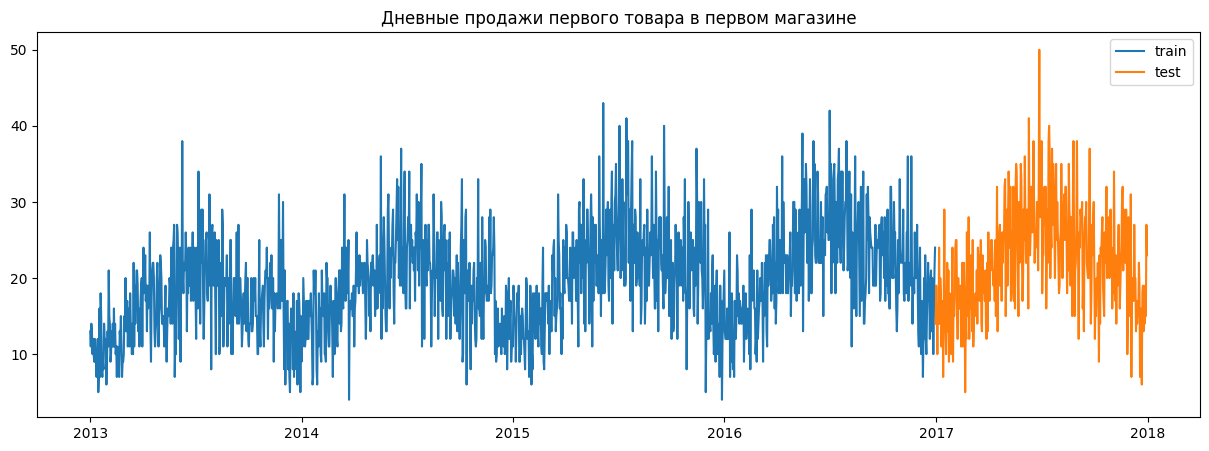

In [103]:
plt.figure(figsize=(15, 5))
plt.title("Дневные продажи первого товара в первом магазине")
plt.plot(data_train_trunc["date"], data_train_trunc["sales"], label="train")
plt.plot(data_test_trunc["date"], data_test_trunc["sales"], label="test")
plt.legend();

Попробуем добавить больше признаков в наш датасет. 

Во-первых добавим более подробную информацию о том, как является сегодняшний день, неделя месяц и т.д.

Также добавим количество товаров, купленное в других магазинах за прошлый день

In [104]:
def create_date_features(date):
    """Создает фичи из даты"""

    row = {}
    row["dayofweek"] = date.dayofweek
    row["quarter"] = date.quarter
    row["month"] = date.month
    row["year"] = date.year
    row["dayofyear"] = date.dayofyear
    row["dayofmonth"] = date.day
    row["weekofyear"] = date.weekofyear
    return row

def add_new_date_feature_in_df(df):
    """Создает фичи из Датафрейма"""

    df.loc[:, "dayofweek"] = df["date"].dt.dayofweek
    df.loc[:, "quarter"] = df["date"].dt.quarter
    df.loc[:, "month"] = df["date"].dt.month
    df.loc[:, "year"] = df["date"].dt.year
    df.loc[:, "dayofyear"] = df["date"].dt.dayofyear
    df.loc[:, "dayofmonth"] = df["date"].dt.day
    df.loc[:, "weekofyear"] = df["date"].dt.isocalendar().week
    return df

In [105]:
X_train = data_train_trunc.drop(["store", "item"], axis=1)
Y_train = data_train_trunc["sales"]

Y_test = data_test_trunc["sales"]

In [106]:
add_new_date_feature_in_df(X_train);

In [107]:
X_train.head()

,date,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2013-01-01,13,1,1,1,2013,1,1,1
1,2013-01-02,11,2,1,1,2013,2,2,1
2,2013-01-03,14,3,1,1,2013,3,3,1
3,2013-01-04,13,4,1,1,2013,4,4,1
4,2013-01-05,10,5,1,1,2013,5,5,1


Теперь добавим информацию за прошлый день из других магазинов

In [108]:
def get_feature_from_other_shops(
    df_train_origin, data, shifts=7, week_seasonal_shifts=4, year_seasonal_shifts=1
):
    df_train = df_train_origin.copy()

    shop_indexes = list(range(2, 10))  # Упрощенный способ записи

    for shop_index in shop_indexes:
        tmp_df = data[(data["item"] == 1) & (data["store"] == shop_index)].copy()
        tmp_df = tmp_df.drop(["store", "item"], axis=1)  # Убираем лишние колонки

        # Делаем сдвиг по продажам
        for shift in [1, 7, 30]:
        # for shift in range(1, 30):
            tmp_df[f"sales_shop_{shop_index}_{shift}"] = tmp_df["sales"].shift(shift)

        # Объединяем данные по дате
            df_train = df_train.merge(
                tmp_df[
                    [
                        "date",
                        f"sales_shop_{shop_index}_{shift}",
                    ]
                ],
                on="date",
                how="left",
            )

    # Добавляем сдвиги для `sales`
    for shift in range(1, shifts + 1):
        df_train[f"shift_{shift}"] = df_train["sales"].shift(shift)

    for shift in range(1, week_seasonal_shifts + 1):
        df_train[f"week_seasonal_shift_{shift}"] = df_train["sales"].shift(shift * 7)

    for shift in range(1, year_seasonal_shifts + 1):
        df_train[f"year_seasonal_shift_{shift}"] = df_train["sales"].shift(shift * 365)

    # Формируем y (метки)
    y = df_train["sales"].copy()

    # Удаляем строки с NaN после всех изменений
    drop_indices = df_train[df_train.isna().sum(axis=1) > 0].index
    df_train = df_train.drop(index=drop_indices)
    y = y.drop(index=drop_indices)

    return df_train, y


# Вызов функции
X_train, Y_train = get_feature_from_other_shops(X_train, data_train, shifts=7)

In [109]:
# Сброс индексов
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

X_train = X_train.drop(index=0, columns=["date", "sales"])
Y_train = Y_train.drop(index=0)
X_train.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,sales_shop_2_1,sales_shop_2_7,sales_shop_2_30,...,shift_3,shift_4,shift_5,shift_6,shift_7,week_seasonal_shift_1,week_seasonal_shift_2,week_seasonal_shift_3,week_seasonal_shift_4,year_seasonal_shift_1
1,3,1,1,2014,2,2,1,19.0,15.0,17.0,...,5.0,14.0,17.0,18.0,16.0,16.0,7.0,5.0,13.0,11.0
2,4,1,1,2014,3,3,1,17.0,20.0,16.0,...,15.0,5.0,14.0,17.0,18.0,18.0,13.0,13.0,15.0,14.0
3,5,1,1,2014,4,4,1,14.0,18.0,27.0,...,9.0,15.0,5.0,14.0,17.0,17.0,11.0,16.0,17.0,13.0
4,6,1,1,2014,5,5,1,16.0,24.0,20.0,...,14.0,9.0,15.0,5.0,14.0,14.0,9.0,15.0,17.0,10.0
5,0,1,1,2014,6,6,2,24.0,20.0,26.0,...,11.0,14.0,9.0,15.0,5.0,5.0,8.0,15.0,8.0,12.0


In [110]:
len(Y_test)

366

Реализуем прямую стратегию. Параллельно будем искать лучшие параметры 

In [111]:
def straight_strategy(X_train, Y_train):
    DAYS = 367
    models = []
    predictions = []

    param_grid = {
        "n_estimators": [500],
        "max_depth": [3, 4, 6],
        "learning_rate": [0.001, 0.005, 0.01, 0.05],
    }

    tscv = TimeSeriesSplit(n_splits=5)

    random_day = np.random.randint(1, DAYS)
    tmp_Y = Y_train.copy()
    tmp_X = X_train.copy()

    tmp_Y = tmp_Y.drop(index=range(1, random_day + 1))
    tmp_X = tmp_X.drop(index=range(len(tmp_X) - random_day, len(tmp_X)))

    model = XGBRegressor()
    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=tscv,
        scoring="neg_mean_absolute_percentage_error",
        verbose=0,
        n_jobs=-1,
    )

    grid_search.fit(tmp_X.to_numpy(), tmp_Y)
    print(grid_search.best_params_)

    for day in tqdm(range(1, DAYS)):
        tmp_Y = Y_train.copy()
        tmp_X = X_train.copy()

        tmp_Y = tmp_Y.drop(index=range(1, day + 1))
        tmp_X = tmp_X.drop(index=range(len(tmp_X) - day, len(tmp_X)))

        model = XGBRegressor(**grid_search.best_params_)
        # model = XGBRegressor(learning_rate= 0.01, max_depth= 3, n_estimators= 500)

        model.fit(tmp_X.to_numpy(), tmp_Y)
        predictions.append(model.predict(X_train.tail(1).to_numpy().reshape(1, -1)))

    return models, predictions

In [112]:
models, predictions = straight_strategy(X_train, Y_train)

MAPE_SALES = mean_absolute_percentage_error(Y_test, predictions)
MSE_SALES = mean_squared_error(Y_test, predictions)
MAE_SALES = mean_absolute_error(Y_test, predictions)

print(f"MSE: {MSE_SALES:.3g}")
print(f"MAE: {MAE_SALES:.3g}")
print(f"MAPE: {MAPE_SALES:.3g}")

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


100%|██████████| 366/366 [04:54<00:00,  1.24it/s]

MSE: 27.8
MAE: 4.16
MAPE: 0.221


**Лучшие данные с семинара:**

**MSE: 23.254015**

**MAE: 3.835524**

**MAPE: 0.193311**

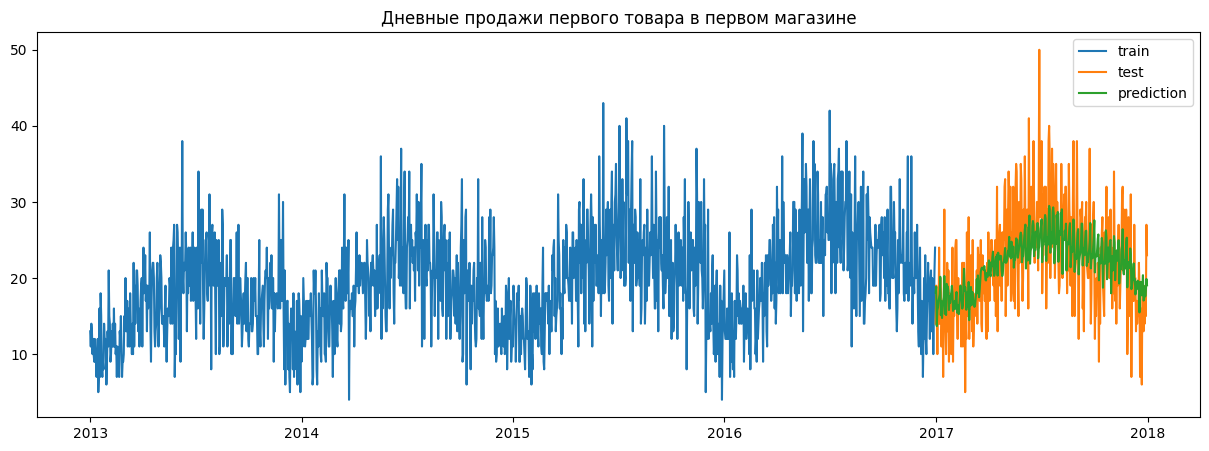

In [113]:
plt.figure(figsize=(15, 5))
plt.title("Дневные продажи первого товара в первом магазине")
plt.plot(data_train_trunc["date"], data_train_trunc["sales"], label="train")
plt.plot(data_test_trunc["date"], data_test_trunc["sales"], label="test")
plt.plot(data_test_trunc["date"], predictions, label="prediction")
plt.legend();

**Выводы**

Как бы я ни старался, как бы не менял сетку параметров, как бы не добавлял сдвиги и новые признаки в train, качество модели при прямой стратегии оказывается хуже лучшей модели с семинара. Ввиду огромных временных затрат, сетку не получается расширить, впрочем мы в любом случае получили сопоставимый, хоть и не лучший результат.

Как копромиссный вариант я решили подбирать лучшие параметры только для одной модели, применяя найденные параметры для остальных моделей. Ввиду однородности данных, такой поступок не должен сильно ухудшать финальные результаты

__3.__ Реализуйте модели, которые будут предсказывать спрос на товары во всех магазинах на тестовой части датасета. Получите значение метрик MSE, MAE, MAPE для всех предсказаний. При этом моделей должно быть меньше, чем количество различных пар "номер магазина, номер товара" в датасете, но больше одной модели.

Будем строить модель для каждого item. Тогда у нас получится 50 моделей, что удовлетворяет условию

Получим датасет, где на месте столбцов будет номер магазина, номер товара, а в качестве значения -- количество проданных товаров.

In [114]:
data_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [115]:
def get_united_df(df):
    df_by_items = []
    stores = list(range(1, 11))
    items = list(range(1, 51))
    for item in tqdm(items):
        tmp_df = pd.DataFrame()
        tmp_df["date"] = df[df["item"] == item]["date"].unique()
        for store in stores:
            sales_data = df[(df["store"] == store) & (df["item"] == item)][["date", "sales"]]
            sales_data = sales_data.rename(columns={"sales": f"sales_store_{store}"})
            tmp_df = tmp_df.merge(sales_data, on="date", how="left")
        df_by_items.append(tmp_df)

    return df_by_items

In [116]:
tags = [f"sales_store_{store}" for store in range(1, 11)]
tags

['sales_store_1',
 'sales_store_2',
 'sales_store_3',
 'sales_store_4',
 'sales_store_5',
 'sales_store_6',
 'sales_store_7',
 'sales_store_8',
 'sales_store_9',
 'sales_store_10']

In [117]:
train_dfs = get_united_df(data_train)
test_dfs = get_united_df(data_test)

train_dfs[0].head()

100%|██████████| 50/50 [00:03<00:00, 13.75it/s]


,date,sales_store_1,sales_store_2,sales_store_3,sales_store_4,sales_store_5,sales_store_6,sales_store_7,sales_store_8,sales_store_9,sales_store_10
0,2013-01-01,13,12,19,10,11,20,7,16,11,14
1,2013-01-02,11,16,8,12,9,6,4,10,9,14
2,2013-01-03,14,16,10,8,12,11,8,12,20,16
3,2013-01-04,13,20,15,15,8,7,7,21,22,17
4,2013-01-05,10,16,22,19,13,12,8,15,22,12


In [118]:
def add_shift(df, shifts=7):
    for store in range(1, 11):
        for shift in range(1, shifts + 1):
            df[f"store_{store}_shift_{shift}"] = df[f"sales_store_{store}"].shift(shift)

    # Формируем y (метки)
    y = df[tags].copy()

    # Удаляем строки с NaN после всех изменений
    drop_indices = df[df.isna().sum(axis=1) > 0].index
    df = df.drop(index=drop_indices)
    df = df.drop(columns=tags)
    y = y.drop(index=drop_indices)

    return df, y

for train_df in train_dfs:
    train_df = add_new_date_feature_in_df(train_df)
for test_df in test_dfs:
    test_df = add_new_date_feature_in_df(test_df)

# Здесь хранятся таплы вида (train_df, y)
train_list = []
test_list = []
for i, train_df in enumerate(train_dfs):
    train_df, y = add_shift(train_df)
    train_list.append((train_df.drop(columns=["date"]).reset_index(drop=True), y.reset_index(drop=True)))

for i, test_df in enumerate(test_dfs):
    test_df, y = add_shift(test_df)
    test_list.append((test_df.drop(columns=["date"]).reset_index(drop=True), y.reset_index(drop=True)))

In [119]:
train_list[0][0].head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,store_1_shift_1,store_1_shift_2,store_1_shift_3,...,store_9_shift_5,store_9_shift_6,store_9_shift_7,store_10_shift_1,store_10_shift_2,store_10_shift_3,store_10_shift_4,store_10_shift_5,store_10_shift_6,store_10_shift_7
0,1,1,1,2013,8,8,2,10.0,12.0,10.0,...,20.0,9.0,11.0,12.0,11.0,12.0,17.0,16.0,14.0,14.0
1,2,1,1,2013,9,9,2,9.0,10.0,12.0,...,22.0,20.0,9.0,19.0,12.0,11.0,12.0,17.0,16.0,14.0
2,3,1,1,2013,10,10,2,12.0,9.0,10.0,...,22.0,22.0,20.0,10.0,19.0,12.0,11.0,12.0,17.0,16.0
3,4,1,1,2013,11,11,2,9.0,12.0,9.0,...,11.0,22.0,22.0,17.0,10.0,19.0,12.0,11.0,12.0,17.0
4,5,1,1,2013,12,12,2,9.0,9.0,12.0,...,7.0,11.0,22.0,20.0,17.0,10.0,19.0,12.0,11.0,12.0


In [120]:
def new_info_function_for_items(row, previous_y_val):
    new_row = row.copy()
    for store in range(1, 11):
        for shift in range(1, 7):
            new_row.loc[f"store_{store}_shift_{shift + 1}"] = row.loc[f"store_{store}_shift_{shift}"]
        new_row.loc[f"store_{store}_shift_{1}"] = previous_y_val.squeeze()[store-1]

    return new_row

In [127]:
fitted_models = []
for i in tqdm(range(50)):
    model = XGBRegressor(learning_rate =0.01, max_depth = 3, n_estimators = 100)
    model.fit(train_list[i][0].to_numpy(), train_list[i][1])
    fitted_models.append(model)

100%|██████████| 50/50 [04:16<00:00,  5.13s/it]


In [128]:
predictions = []
for i, fitted_model in tqdm(enumerate(fitted_models)):
    predictions.append(
        recursive_prediction(
            fitted_model,
            train_list[i][0],
            train_list[i][1],
            new_info_function_for_items,
            n=len(test_list[0][0]),
        ).squeeze()
    )

50it [02:54,  3.50s/it]


In [129]:
def count_metrics(predictions, y_test):
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)

    return {"MAPE": MAPE, "MSE": MSE, "MAE": MAE}


def plot_predictions(predictions, y_test):
    plt.figure(figsize=(15, 5))
    plt.plot(y_test, label="True")
    plt.plot(predictions, label="Predictions")
    plt.legend()
    plt.show()


metrics_df = []
for i, prediction in enumerate(predictions):
    metrics = count_metrics(prediction, test_list[i][1])
    metrics["item"] = i + 1
    metrics_df.append(metrics)

metrics_df = pd.DataFrame(metrics_df, columns=["item", "MAPE", "MSE", "MAE"])
metrics_df = metrics_df.set_index("item")
metrics_df.head(50)

,MAPE,MSE,MAE
item,,,
1,0.277193,83.941907,7.063085
2,0.238359,470.580607,16.814573
3,0.260929,220.205268,11.543624
4,0.285090,92.154003,7.339158
5,0.294238,65.822608,6.266553
6,0.234558,461.772369,16.518318
7,0.236152,454.143905,16.527936
8,0.235259,801.252289,22.104494
9,0.241057,378.936856,15.068732


**Выводы**

В данном номере мы реализовали прямую стратегию прогнозирования. Как было предсказано теоретически, не смотря на отсутствие накопления ошибок, эта стратегия оказалась во-первых хуже рекурсивной, а во вторых трудно обучаемой в виду больших временных затрат для подбора параметров и обучения большого количества моделей. 

Для решения последней проблемы с подбором парметров, была идея взять случайную модель из 365 и подобрать оптимальные параметры для нее, и в дальнейшем использовать их для всех моделей, что сократит время на перебор.

В конце мы магазины по типу продаваемого товара и предсказывали вектор из продаж, используя при этом рекурсивную стратегию. В данном случае у нас получилось добиться неплохих значений метрики MAPE.